<a href="https://colab.research.google.com/github/eerfan2/klasifikasi-kualitas-udara-ann/blob/main/klasifikasi_kualitas_udara_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Install & Import Libraries

In [15]:
!pip install openpyxl xlrd -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Library berhasil diimport!")

✅ Library berhasil diimport!


Menginstall library untuk baca Excel dan mengimport semua library yang dibutuhkan untuk analisis data dan machine learning.

2. Upload File Exce

In [30]:
print("📁 Silakan upload file Excel Anda...")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
print(f"\n✅ File '{filename}' berhasil diupload!")

# Baca Excel
df = pd.read_excel(filename, engine='xlrd')

print(f"\n📊 Dataset berhasil dimuat!")
print(f"Jumlah data: {df.shape[0]} baris, {df.shape[1]} kolom")
print(f"\nNama kolom asli:")
print(df.columns.tolist())

📁 Silakan upload file Excel Anda...


Saving Dataset ISPU.xls to Dataset ISPU.xls

✅ File 'Dataset ISPU.xls' berhasil diupload!

📊 Dataset berhasil dimuat!
Jumlah data: 365 baris, 12 kolom

Nama kolom asli:
['periode_data', 'tanggal', 'pm_10', 'pm_duakomalima', 'so2', 'co', 'o3', 'no2', 'max', 'critical', 'categori', 'lokasi_spku']


Membuka dialog upload file, lalu membaca file Excel yang diupload ke dalam DataFrame (tabel data)

3. Eksplorasi Data

In [32]:
print("=" * 60)
print("5 DATA PERTAMA")
print("=" * 60)
display(df.head(10))

print("\n" + "=" * 60)
print("INFORMASI DATASET")
print("=" * 60)
df.info()

print("\n" + "=" * 60)
print("STATISTIK DESKRIPTIF")
print("=" * 60)
display(df.describe())

print("\n" + "=" * 60)
print("MISSING VALUES")
print("=" * 60)
missing = df.isnull().sum()
print(missing[missing > 0])

print("\n" + "=" * 60)
print("DISTRIBUSI KATEGORI")
print("=" * 60)
print(df['categori'].value_counts())

5 DATA PERTAMA


,periode_data,tanggal,pm_10,pm_duakomalima,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,202212,44926625,54,73,56,24,23,24,73,"PM2,5",SEDANG,DKI4
1,202212,2022-12-30 00:00:00,40,64,57,21,17,24,64,"PM2,5",SEDANG,DKI4
2,202207,2022-07-06 00:00:00,75,129,45,25,71,26,129,"PM2,5",TIDAK SEHAT,DKI4
3,202207,2022-07-05 00:00:00,66,110,47,16,61,23,110,"PM2,5",TIDAK SEHAT,DKI4
4,202207,2022-07-04 00:00:00,56,78,49,11,60,13,78,"PM2,5",SEDANG,DKI4
5,202207,2022-07-03 00:00:00,78,126,48,17,126,25,126,"PM2,5",TIDAK SEHAT,DKI2
6,202207,2022-07-02 00:00:00,81,137,47,18,106,29,137,"PM2,5",TIDAK SEHAT,DKI4
7,202208,2022-08-01 00:00:00,68,109,50,12,91,19,109,"PM2,5",TIDAK SEHAT,DKI4
8,202208,2022-08-31 00:00:00,85,148,51,25,74,37,148,"PM2,5",TIDAK SEHAT,DKI4
9,202208,2022-08-30 00:00:00,59,84,50,15,56,29,84,"PM2,5",SEDANG,DKI4



INFORMASI DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   periode_data    365 non-null    int64 
 1   tanggal         365 non-null    object
 2   pm_10           365 non-null    int64 
 3   pm_duakomalima  365 non-null    int64 
 4   so2             365 non-null    int64 
 5   co              365 non-null    int64 
 6   o3              365 non-null    int64 
 7   no2             365 non-null    int64 
 8   max             365 non-null    int64 
 9   critical        364 non-null    object
 10  categori        365 non-null    object
 11  lokasi_spku     365 non-null    object
dtypes: int64(8), object(4)
memory usage: 34.3+ KB

STATISTIK DESKRIPTIF


,periode_data,pm_10,pm_duakomalima,so2,co,o3,no2,max
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,202206.526027,59.819178,92.939726,47.926027,18.424658,57.243836,28.753425,93.852055
std,3.452584,13.330135,24.421363,4.569669,7.097666,23.345547,8.677337,24.435720
min,202201.000000,23.000000,40.000000,37.000000,7.000000,15.000000,6.000000,49.000000
25%,202204.000000,52.000000,75.000000,44.000000,14.000000,39.000000,23.000000,76.000000
50%,202207.000000,60.000000,92.000000,49.000000,17.000000,54.000000,28.000000,93.000000
75%,202210.000000,68.000000,111.000000,51.000000,21.000000,71.000000,34.000000,111.000000
max,202212.000000,95.000000,165.000000,62.000000,55.000000,181.000000,52.000000,181.000000



MISSING VALUES
critical    1
dtype: int64

DISTRIBUSI KATEGORI
categori
SEDANG         225
TIDAK SEHAT    137
BAIK             3
Name: count, dtype: int64


Menampilkan 10 data pertama, informasi tipe data, dan statistik deskriptif (rata-rata, min, max) dari dataset.

 4. Data Preprocessing

In [35]:
# Definisikan kolom features dan target berdasarkan dataset Anda
feature_columns = ['pm_10', 'pm_duakomalima', 'so2', 'co', 'o3', 'no2'] # Menggunakan nama kolom dengan huruf kecil
target_column = 'categori' # Menggunakan nama kolom dengan huruf kecil

print("=" * 60)
print("DATA PREPROCESSING")
print("=" * 60)
print(f"Feature columns: {feature_columns}")
print(f"Target column: {target_column}")

# Pilih kolom yang diperlukan
df_selected = df[feature_columns + [target_column]].copy()

print(f"\n📊 Data awal: {df_selected.shape[0]} baris")

# Hapus missing values
df_clean = df_selected.dropna()
print(f"📊 Data setelah hapus missing values: {df_clean.shape[0]} baris")
print(f"🗑️  Baris yang dihapus: {df_selected.shape[0] - df_clean.shape[0]}")

# Hapus duplikat
df_clean = df_clean.drop_duplicates()
print(f"📊 Data setelah hapus duplikat: {df_clean.shape[0]} baris")

# Filter outlier menggunakan IQR (opsional)
def remove_outliers_iqr(df, columns):
    df_out = df.copy()
    for col in columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    return df_out

df_clean = remove_outliers_iqr(df_clean, feature_columns)
print(f"📊 Data setelah remove outliers: {df_clean.shape[0]} baris")

# Cek distribusi kategori setelah cleaning
print("\n" + "=" * 60)
print("DISTRIBUSI KATEGORI SETELAH CLEANING")
print("=" * 60)
category_counts = df_clean[target_column].value_counts()
print(category_counts)
print(f"\nPersentase:")
print(category_counts / category_counts.sum() * 100)

# Pisahkan features dan target
X = df_clean[feature_columns].values
y = df_clean[target_column].values

print(f"\n✅ Preprocessing selesai!")
print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")

DATA PREPROCESSING
Feature columns: ['pm_10', 'pm_duakomalima', 'so2', 'co', 'o3', 'no2']
Target column: categori

📊 Data awal: 365 baris
📊 Data setelah hapus missing values: 365 baris
🗑️  Baris yang dihapus: 0
📊 Data setelah hapus duplikat: 365 baris
📊 Data setelah remove outliers: 333 baris

DISTRIBUSI KATEGORI SETELAH CLEANING
categori
SEDANG         213
TIDAK SEHAT    120
Name: count, dtype: int64

Persentase:
categori
SEDANG         63.963964
TIDAK SEHAT    36.036036
Name: count, dtype: float64

✅ Preprocessing selesai!
Shape X: (333, 6)
Shape y: (333,)


Memilih kolom yang dipakai, menghapus data kosong (missing values), dan menghapus data yang nilainya terlalu ekstrem (outlier).

5. Encode & Normalisasi

In [36]:
# Encode target (SEDANG, TIDAK SEHAT, dll -> angka)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Konversi ke categorical untuk multi-class classification
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes)

print("=" * 60)
print("ENCODING TARGET")
print("=" * 60)
print(f"Jumlah kelas: {num_classes}")
print(f"Kelas: {le.classes_}")
print(f"\nMapping:")
for i, class_name in enumerate(le.classes_):
    print(f"  {class_name:20s} -> {i}")

# Normalisasi features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n✅ Encoding dan Normalisasi selesai!")
print(f"Shape X_scaled: {X_scaled.shape}")
print(f"Shape y_categorical: {y_categorical.shape}")

ENCODING TARGET
Jumlah kelas: 2
Kelas: ['SEDANG' 'TIDAK SEHAT']

Mapping:
  SEDANG               -> 0
  TIDAK SEHAT          -> 1

✅ Encoding dan Normalisasi selesai!
Shape X_scaled: (333, 6)
Shape y_categorical: (333, 2)


Mengubah kategori (SEDANG, TIDAK SEHAT) menjadi angka (0,1,2), dan menormalisasi data agar semua nilai dalam skala yang sama (0-1).

6. Split Data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_categorical,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print("=" * 60)
print("PEMBAGIAN DATA TRAINING DAN TESTING")
print("=" * 60)
print(f"Total data: {X_scaled.shape[0]} samples")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/X_scaled.shape[0]*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/X_scaled.shape[0]*100:.1f}%)")
print(f"Jumlah features: {X_train.shape[1]}")
print(f"Jumlah kelas: {num_classes}")

PEMBAGIAN DATA TRAINING DAN TESTING
Total data: 333 samples
Training set: 266 samples (79.9%)
Testing set: 67 samples (20.1%)
Jumlah features: 6
Jumlah kelas: 2


Membagi data menjadi 80% untuk latihan (training) dan 20% untuk uji coba (testing).

7. Membangun Model ANN

In [38]:
model = Sequential([
    # Input layer
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),

    # Hidden layer 1
    Dense(64, activation='relu'),
    Dropout(0.3),

    # Hidden layer 2
    Dense(32, activation='relu'),
    Dropout(0.2),

    # Output layer
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("=" * 60)
print("ARSITEKTUR MODEL ARTIFICIAL NEURAL NETWORK")
print("=" * 60)
model.summary()

ARSITEKTUR MODEL ARTIFICIAL NEURAL NETWORK


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,298 (44.13 KB)

 Trainable params: 11,298 (44.13 KB)

 Non-trainable params: 0 (0.00 B)

Membuat arsitektur Neural Network dengan 3 hidden layer (128, 64, 32 neuron) dan mengatur cara model belajar.

 8. Training Model

In [39]:
# Setup callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=0.00001,
    verbose=1
)

print("=" * 60)
print("🚀 MEMULAI TRAINING MODEL")
print("=" * 60)
print("Konfigurasi:")
print(f"  - Epochs: 100")
print(f"  - Batch size: 32")
print(f"  - Validation split: 20%")
print(f"  - Early stopping: Patience 20")
print(f"  - Learning rate reduction: Patience 10")
print("=" * 60)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("\n✅ Training selesai!")

🚀 MEMULAI TRAINING MODEL
Konfigurasi:
  - Epochs: 100
  - Batch size: 32
  - Validation split: 20%
  - Early stopping: Patience 20
  - Learning rate reduction: Patience 10
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.5873 - loss: 0.6794 - val_accuracy: 0.7963 - val_loss: 0.5836 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7652 - loss: 0.5916 - val_accuracy: 0.8148 - val_loss: 0.4917 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8638 - loss: 0.4920 - val_accuracy: 0.8148 - val_loss: 0.4134 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8700 - loss: 0.4191 - val_accuracy: 0.8148 - val_loss: 0.3548 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9090 - loss: 0.3453 - val_accuracy: 0.8148 - val_loss: 0.3132 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9168 - loss: 0

Melatih model dengan data training sebanyak 100 iterasi (epochs). Model akan belajar pola dari data.

9. Visualisasi Training

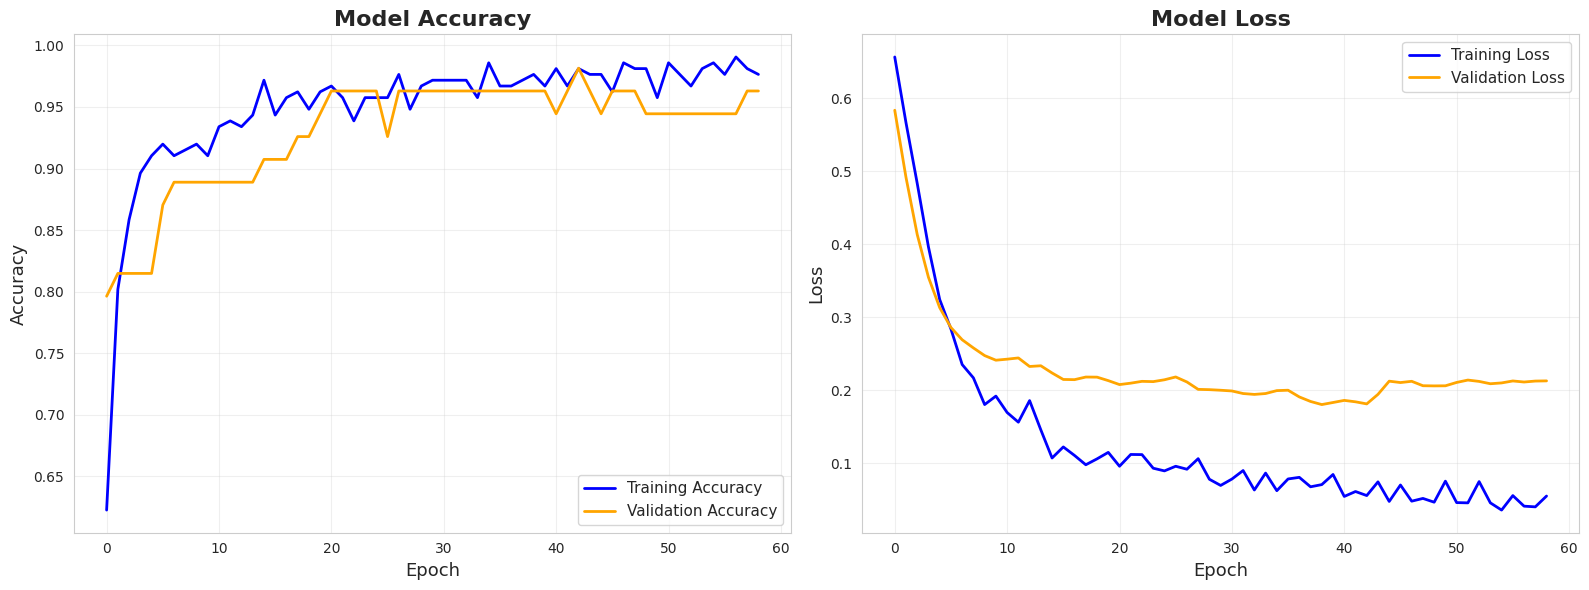

✅ Grafik disimpan sebagai 'training_history.png'


In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, color='blue')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='orange')
axes[0].set_title('Model Accuracy', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=13)
axes[0].set_ylabel('Accuracy', fontsize=13)
axes[0].legend(loc='lower right', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot Loss
axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2, color='blue')
axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='orange')
axes[1].set_title('Model Loss', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=13)
axes[1].set_ylabel('Loss', fontsize=13)
axes[1].legend(loc='upper right', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Grafik disimpan sebagai 'training_history.png'")

Membuat grafik untuk melihat perkembangan akurasi dan loss selama proses training. Grafik naik = model semakin pintar.

10. Evaluasi Model

In [41]:
# Prediksi pada data testing
y_pred_proba = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print("=" * 60)
print("HASIL EVALUASI MODEL ANN")
print("=" * 60)
print(f"Accuracy  : {accuracy*100:.2f}%")
print(f"Precision : {precision*100:.2f}%")
print(f"Recall    : {recall*100:.2f}%")
print(f"F1-Score  : {f1*100:.2f}%")

print("\n" + "=" * 60)
print("CLASSIFICATION REPORT")
print("=" * 60)
print(classification_report(y_true, y_pred, target_names=le.classes_, zero_division=0))

HASIL EVALUASI MODEL ANN
Accuracy  : 98.51%
Precision : 98.54%
Recall    : 98.51%
F1-Score  : 98.50%

CLASSIFICATION REPORT
              precision    recall  f1-score   support

      SEDANG       0.98      1.00      0.99        43
 TIDAK SEHAT       1.00      0.96      0.98        24

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.99        67



Menguji model dengan data testing dan menghitung akurasi, precision, recall, f1-score untuk melihat seberapa bagus model.

 11. Confusion Matrix

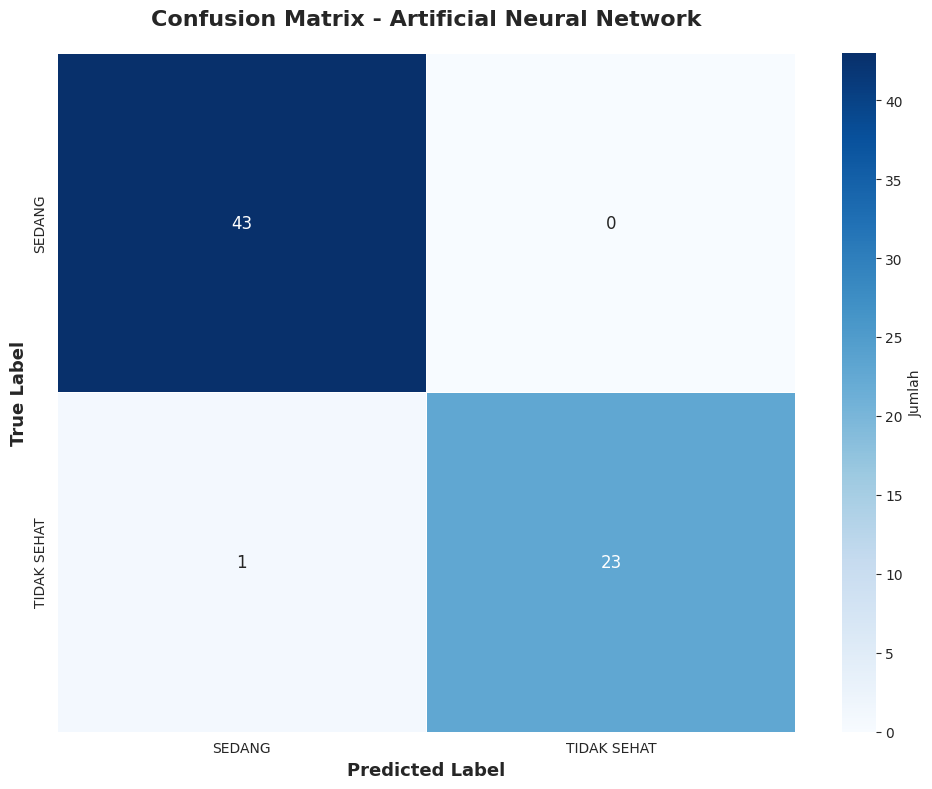


AKURASI PER KELAS
SEDANG              : 100.00%
TIDAK SEHAT         :  95.83%

✅ Confusion Matrix disimpan sebagai 'confusion_matrix.png'


In [42]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cbar_kws={'label': 'Jumlah'},
            linewidths=0.5,
            annot_kws={'size': 12})
plt.title('Confusion Matrix - Artificial Neural Network',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=13, fontweight='bold')
plt.ylabel('True Label', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Hitung akurasi per kelas
print("\n" + "=" * 60)
print("AKURASI PER KELAS")
print("=" * 60)
for i, class_name in enumerate(le.classes_):
    if cm[i].sum() > 0:
        class_accuracy = cm[i, i] / cm[i].sum() * 100
        print(f"{class_name:20s}: {class_accuracy:6.2f}%")
    else:
        print(f"{class_name:20s}: N/A (tidak ada data)")

print("\n✅ Confusion Matrix disimpan sebagai 'confusion_matrix.png'")

 Membuat tabel heatmap yang menunjukkan berapa prediksi yang benar dan salah untuk setiap kategori.

12. Tabel Hasil

In [43]:
# Buat DataFrame hasil
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score (%)': [
        f"{accuracy*100:.2f}",
        f"{precision*100:.2f}",
        f"{recall*100:.2f}",
        f"{f1*100:.2f}"
    ]
})

print("\n" + "=" * 60)
print("TABEL HASIL EVALUASI MODEL ANN")
print("=" * 60)
display(results_df)

# Export ke CSV
results_df.to_csv('hasil_evaluasi_model.csv', index=False)
print("\n✅ Hasil evaluasi disimpan ke 'hasil_evaluasi_model.csv'")

# Download file
files.download('hasil_evaluasi_model.csv')


TABEL HASIL EVALUASI MODEL ANN


,Metric,Score (%)
0,Accuracy,98.51
1,Precision,98.54
2,Recall,98.51
3,F1-Score,98.50



✅ Hasil evaluasi disimpan ke 'hasil_evaluasi_model.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Membuat tabel ringkasan hasil evaluasi dalam bentuk DataFrame dan menyimpannya ke file CSV.

13. Simpan Model

In [44]:
# Simpan model
model.save('model_ann_kualitas_udara.h5')
print("✅ Model disimpan sebagai 'model_ann_kualitas_udara.h5'")

# Simpan scaler dan encoder
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

print("✅ Scaler dan Label Encoder disimpan!")

# Download semua file
files.download('model_ann_kualitas_udara.h5')
files.download('scaler.pkl')
files.download('label_encoder.pkl')
files.download('confusion_matrix.png')
files.download('training_history.png')

✅ Model disimpan sebagai 'model_ann_kualitas_udara.h5'
✅ Scaler dan Label Encoder disimpan!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Menyimpan model yang sudah dilatih ke file .h5 agar bisa digunakan lagi tanpa perlu training ulang.

14. Testing Prediksi

In [45]:
def predict_air_quality(pm10, pm_duakomalima, so2, co, o3, no2):
    """
    Fungsi untuk memprediksi kualitas udara berdasarkan input parameter

    Parameters:
    - pm10: Particulate Matter 10
    - pm_duakomalima: PM2.5
    - so2: Sulfur Dioxide
    - co: Carbon Monoxide
    - o3: Ozone
    - no2: Nitrogen Dioxide
    """
    # Buat array dari input
    new_data = np.array([[pm10, pm_duakomalima, so2, co, o3, no2]])

    # Normalisasi
    new_data_scaled = scaler.transform(new_data)

    # Prediksi
    prediction_proba = model.predict(new_data_scaled, verbose=0)
    prediction = np.argmax(prediction_proba, axis=1)

    # Decode hasil
    result = le.inverse_transform(prediction)[0]
    confidence = np.max(prediction_proba) * 100

    # Tampilkan hasil
    print("=" * 60)
    print("HASIL PREDIKSI KUALITAS UDARA")
    print("=" * 60)
    print(f"Input Parameter:")
    print(f"  PM_10           : {pm10}")
    print(f"  PM_DUAKOMALIMA  : {pm_duakomalima}")
    print(f"  SO2             : {so2}")
    print(f"  CO              : {co}")
    print(f"  O3              : {o3}")
    print(f"  NO2             : {no2}")
    print("-" * 60)
    print(f"Prediksi Kategori: {result}")
    print(f"Confidence       : {confidence:.2f}%")
    print("=" * 60)

    # Tampilkan probabilitas semua kelas
    print("\nProbabilitas per kelas:")
    for i, class_name in enumerate(le.classes_):
        prob = prediction_proba[0][i] * 100
        print(f"  {class_name:20s}: {prob:6.2f}%")

    return result, confidence

# Test dengan data dari screenshot (baris pertama)
print("\n🧪 TESTING DENGAN DATA SAMPLE:")
predict_air_quality(
    pm10=54,
    pm_duakomalima=73,
    so2=56,
    co=24,
    o3=23,
    no2=24
)

# Test dengan data baris ke-3 (TIDAK SEHAT)
print("\n🧪 TESTING DENGAN DATA TIDAK SEHAT:")
predict_air_quality(
    pm10=75,
    pm_duakomalima=129,
    so2=45,
    co=25,
    o3=71,
    no2=26
)


🧪 TESTING DENGAN DATA SAMPLE:
HASIL PREDIKSI KUALITAS UDARA
Input Parameter:
  PM_10           : 54
  PM_DUAKOMALIMA  : 73
  SO2             : 56
  CO              : 24
  O3              : 23
  NO2             : 24
------------------------------------------------------------
Prediksi Kategori: SEDANG
Confidence       : 100.00%

Probabilitas per kelas:
  SEDANG              : 100.00%
  TIDAK SEHAT         :   0.00%

🧪 TESTING DENGAN DATA TIDAK SEHAT:
HASIL PREDIKSI KUALITAS UDARA
Input Parameter:
  PM_10           : 75
  PM_DUAKOMALIMA  : 129
  SO2             : 45
  CO              : 25
  O3              : 71
  NO2             : 26
------------------------------------------------------------
Prediksi Kategori: TIDAK SEHAT
Confidence       : 100.00%

Probabilitas per kelas:
  SEDANG              :   0.00%
  TIDAK SEHAT         : 100.00%


('TIDAK SEHAT', np.float32(99.999084))

Membuat fungsi untuk memprediksi kualitas udara dari data baru yang diinput manual. Bisa langsung dicoba dengan angka apapun.